## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(mouse_metadata['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice = []
duplicate_mice = []

for i in range(len(combined_df)):
    if [combined_df[['Mouse ID', 'Timepoint'][0]][i], combined_df[['Mouse ID', 'Timepoint'][1]][i]] not in mice:
        mice.append([combined_df[['Mouse ID', 'Timepoint'][0]][i], combined_df[['Mouse ID', 'Timepoint'][1]][i]])
    else:
        duplicate_mice.append([combined_df[['Mouse ID', 'Timepoint'][0]][i], combined_df[['Mouse ID', 'Timepoint'][1]][i]])

duplicate_mice



[['g989', 0], ['g989', 5], ['g989', 10], ['g989', 15], ['g989', 20]]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[(combined_df['Mouse ID'] == 'g989') & ((combined_df['Timepoint'] == 0) | 
                                                      (combined_df['Timepoint'] == 5) | 
                                                      (combined_df['Timepoint'] == 10) |
                                                      (combined_df['Timepoint'] == 15) |
                                                      (combined_df['Timepoint'] == 20))]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for i in range(len(duplicate_mice)):
    duplicate_indices = combined_df[(combined_df['Mouse ID'] == duplicate_mice[i][0]) & (combined_df['Timepoint'] == duplicate_mice[i][1])].index
    for index in duplicate_indices:
        combined_df.drop(index)


In [7]:
# Checking the number of mice in the clean DataFrame.
len(combined_df['Mouse ID'].unique())

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen = combined_df.groupby('Drug Regimen')
print(drug_regimen['Mouse ID'])

# Assemble the resulting series into a single summary dataframe.
regimen_summary_table = pd.DataFrame({'Tumor Volume Mean': drug_regimen['Tumor Volume (mm3)'].mean(),
                                      'Tumor Volume Median': drug_regimen['Tumor Volume (mm3)'].median(),
                                      'Tumor Volume Variance': drug_regimen['Tumor Volume (mm3)'].var(),
                                      'Tumor Volume Standard Deviation': drug_regimen['Tumor Volume (mm3)'].std(),
                                      'Tumor Volume SEM': drug_regimen['Tumor Volume (mm3)'].sem()})

#regimen_summary_table

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_regimen_summary = drug_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregate_regimen_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

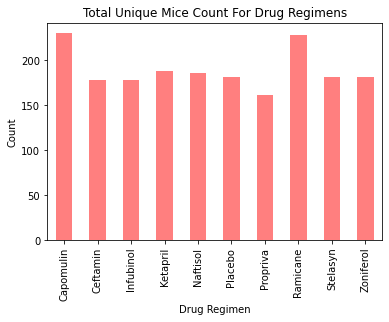

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

count_table = drug_regimen['Mouse ID'].count()
pandas_bar_plot = count_table.plot(kind='bar', title='Total Unique Mice Count For Drug Regimens', color='red', alpha=0.5)
pandas_bar_plot.set_ylabel('Count')
plt.show()

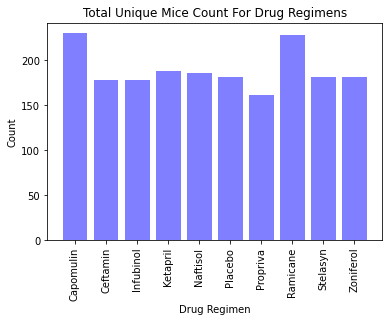

In [21]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(count_table))
tick_locations = [i for i in x_axis]
xtickers = [value for value in count_table.index]
y_axis = [value for value in count_table]

plt.bar(x_axis, y_axis, color='b', alpha=0.5, align='center')
plt.xticks(tick_locations, xtickers, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.title('Total Unique Mice Count For Drug Regimens')
plt.show()

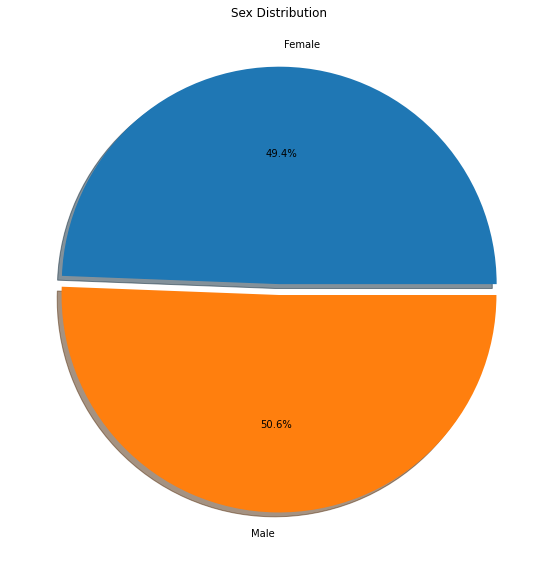

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = combined_df.groupby('Sex')
gender_distribution = gender_distribution['Sex'].count()

explode = [0.05, 0]
pandas_pie = gender_distribution.plot(kind='pie', shadow=True, autopct='%1.1f%%', figsize=(10, 10), explode=explode)
pandas_pie.set_title('Sex Distribution')
pandas_pie.set_ylabel('')
plt.show()


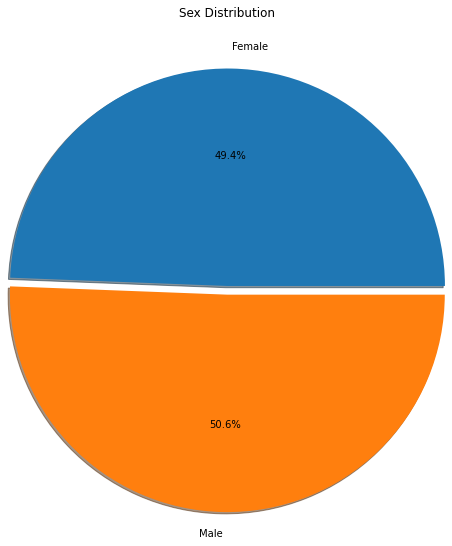

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = [0.1, 0]
labels = [value for value in gender_distribution.index]
plt.pie(gender_distribution, explode=explode, shadow=True, labels=labels, 
       autopct='%1.1f%%', radius=2.5)
plt.title('Sex Distribution', y=1.75)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
